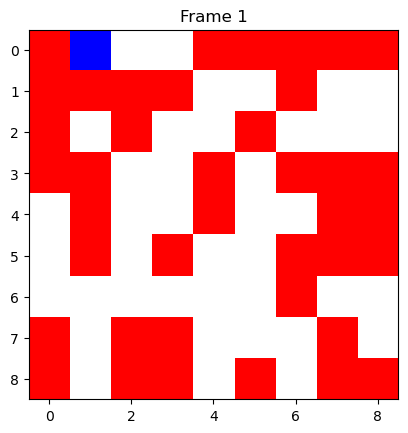

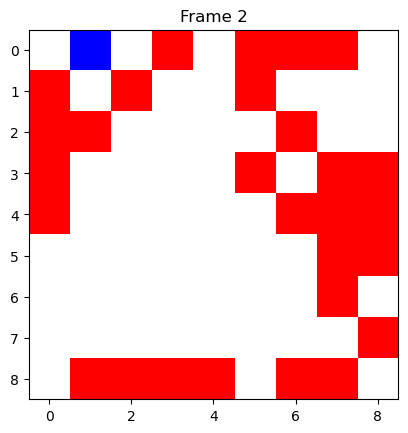

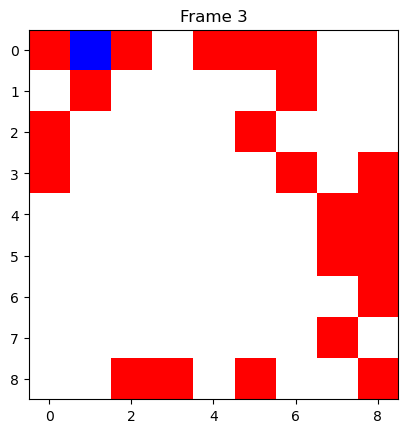

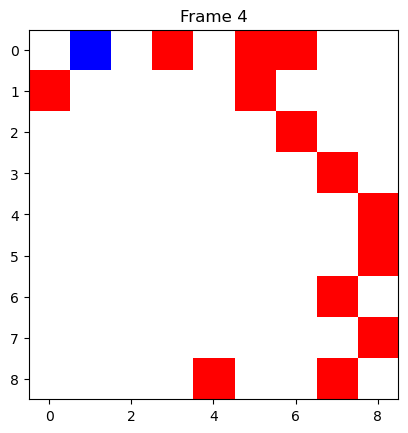

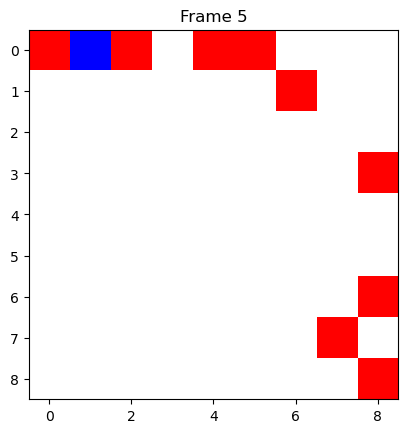

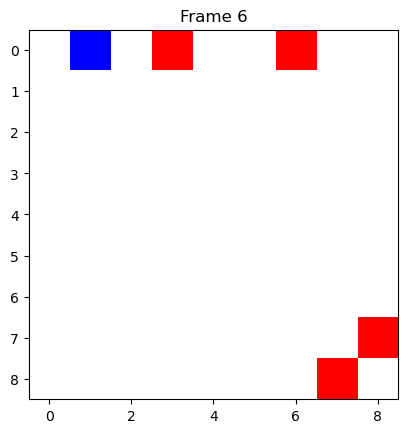

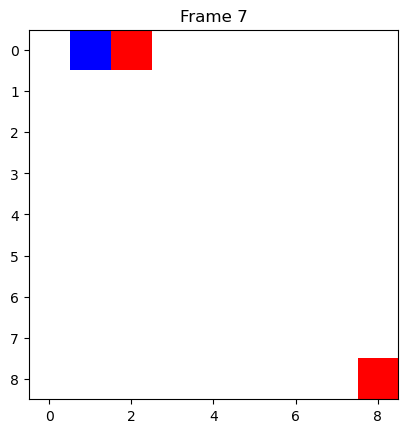

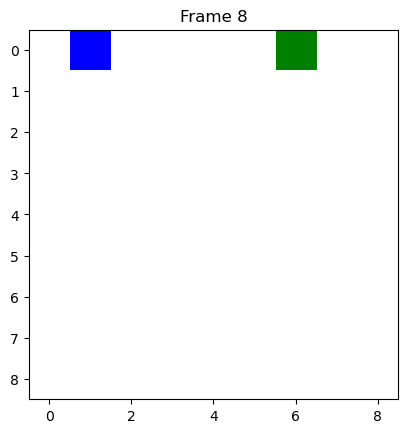

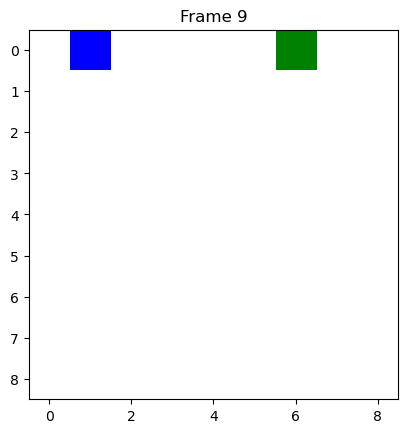

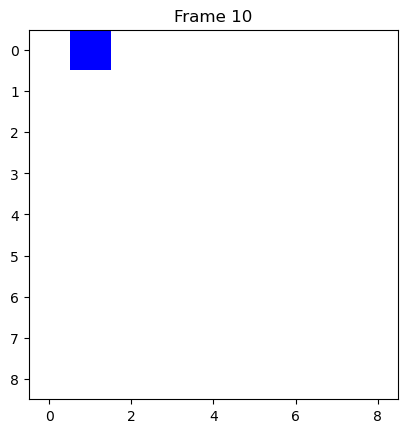

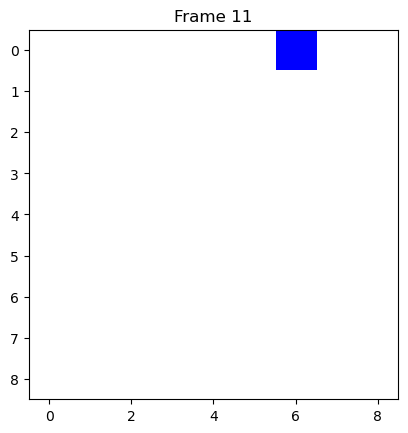

In [9]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

# Read the txt file and extract the dimensions and frames
with open('/home/radhikasahai/chem_274B/Chem274B_Final_Project/Bin/dummy.txt', 'r') as file:
    lines = file.readlines()
    dim_line = lines[0].split('\t')
    dim1, dim2 = int(dim_line[0]), int(dim_line[1])

    frames = []
    for line in lines[1:]:
        frame = [int(cell) for cell in line.split('\t')[:-1]]  # Exclude the last empty element
        frames.append(frame)

# Reshape each frame into a 2D matrix
frames_matrix = np.array(frames).reshape(len(frames), dim1, dim2)

# Define a custom colormap
cmap_custom = ListedColormap(['white', 'red', 'green', 'blue'])

# Create a visualization for each frame
for i, frame in enumerate(frames_matrix):
    plt.imshow(frame, cmap=cmap_custom, interpolation='nearest')
    plt.title(f'Frame {i+1}')
    plt.show()


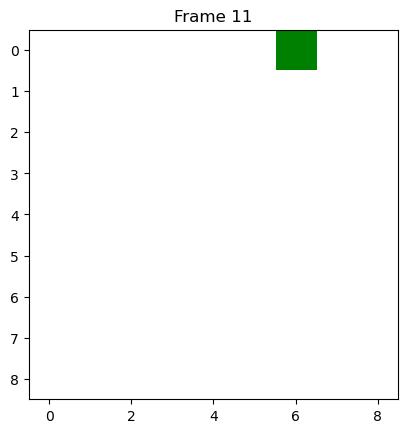

In [14]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.animation import FuncAnimation
import numpy as np

# Read the txt file and extract the dimensions and frames
with open('/home/radhikasahai/chem_274B/Chem274B_Final_Project/Bin/Test_COVID_CAframe_output.txt', 'r') as file:
    lines = file.readlines()
    dim_line = lines[0].split('\t')
    dim1, dim2 = int(dim_line[0]), int(dim_line[1])

    frames = []
    for line in lines[1:]:
        frame = [int(cell) for cell in line.split('\t')[:-1]]  # Exclude the last empty element
        frames.append(frame)

# Reshape each frame into a 2D matrix
frames_matrix = np.array(frames).reshape(len(frames), dim1, dim2)

# Define a custom colormap
cmap_custom = ListedColormap(['white', 'red', 'green', 'blue'])

# Set up the figure and axis
fig, ax = plt.subplots()
img = ax.imshow(frames_matrix[0], cmap=cmap_custom, interpolation='nearest')



# Update function for animation
def update(frame):
    img.set_array(frames_matrix[frame])
    ax.set_title(f'Frame {frame+1}')
    return img,

# Create animation
animation = FuncAnimation(fig, update, frames=len(frames_matrix), interval=200, repeat=True, repeat_delay=1000)

# Save the animation to a file (adjust the filename and format as needed)
animation.save('COVID_CA.gif', writer='pillow', fps=5)

plt.show()


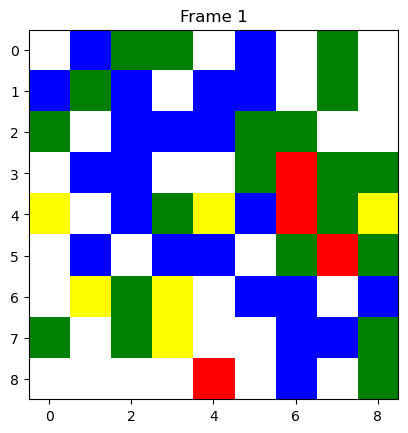

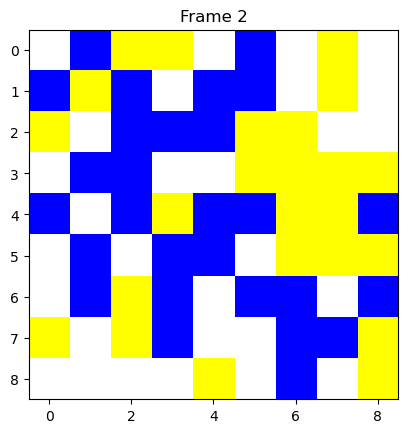

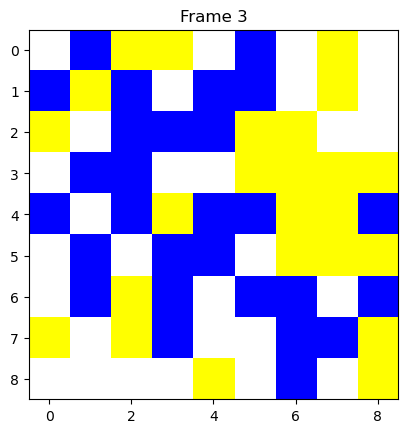

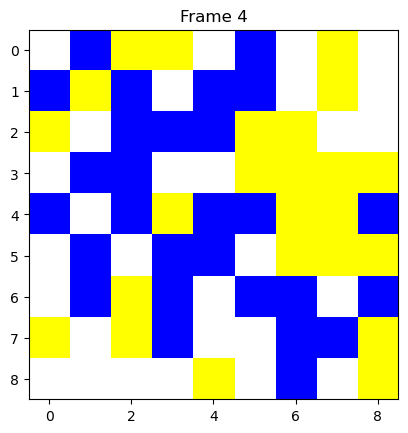

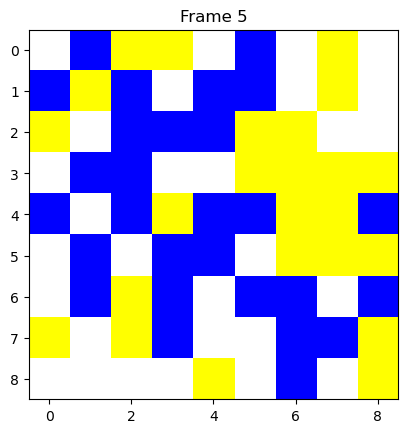

In [19]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

# Read the txt file and extract the dimensions and frames
with open('/home/radhikasahai/chem_274B/Chem274B_Final_Project/Bin/Test_COVID_CAframe_output.txt', 'r') as file:
    lines = file.readlines()
    dim_line = lines[0].split('\t')
    dim1, dim2 = int(dim_line[0]), int(dim_line[1])

    frames = []
    for line in lines[1:]:
        frame = [int(cell) for cell in line.split('\t')[:-1]]  # Exclude the last empty element
        frames.append(frame)

# Reshape each frame into a 2D matrix
frames_matrix = np.array(frames).reshape(len(frames), dim1, dim2)

# Define a custom colormap
cmap_custom = ListedColormap(['white', 'red', 'yellow', 'green', 'blue'])

# Create a visualization for each frame
for i, frame in enumerate(frames_matrix):
    plt.imshow(frame, cmap=cmap_custom, interpolation='nearest')
    plt.title(f'Frame {i+1}')
    plt.show()


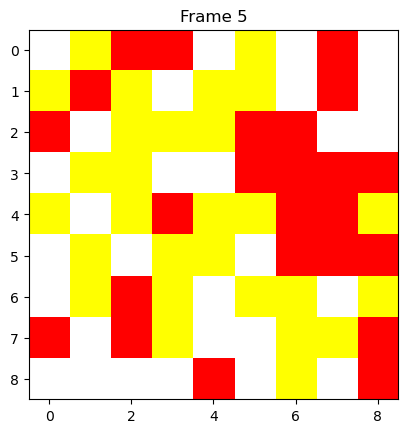

In [28]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.animation import FuncAnimation
import numpy as np

# Read the txt file and extract the dimensions and frames
with open('/home/radhikasahai/chem_274B/Chem274B_Final_Project/Bin/Test_COVID_CAframe_output.txt', 'r') as file:
    lines = file.readlines()
    dim_line = lines[0].split('\t')
    dim1, dim2 = int(dim_line[0]), int(dim_line[1])

    frames = []
    for line in lines[1:]:
        frame = [int(cell) for cell in line.split('\t')[:-1]]  # Exclude the last empty element
        frames.append(frame)

# Reshape each frame into a 2D matrix
frames_matrix = np.array(frames).reshape(len(frames), dim1, dim2)

# Define a custom colormap
cmap_custom = ListedColormap(['white', 'red', 'yellow', 'green', 'blue'])

# Set up the figure and axis
fig, ax = plt.subplots()
img = ax.imshow(frames_matrix[0], cmap=cmap_custom, interpolation='nearest')

# Update function for animation
def update(frame):
    img.set_array(frames_matrix[frame])
    ax.set_title(f'Frame {frame + 1}')
    return img,

# Create animation
animation = FuncAnimation(fig, update, frames=len(frames_matrix), interval=200, repeat=True, repeat_delay=1000)

# Save the animation to a GIF file (adjust the filename as needed)
animation.save('/home/radhikasahai/chem_274B/Chem274B_Final_Project/Utils/Plots/COVID_CA.gif', writer='pillow', fps=5)

plt.show()


No states to plot.
